An illustration of the alpha-shaped currents implemented by the iaf_psc_alpha neuron model in nest

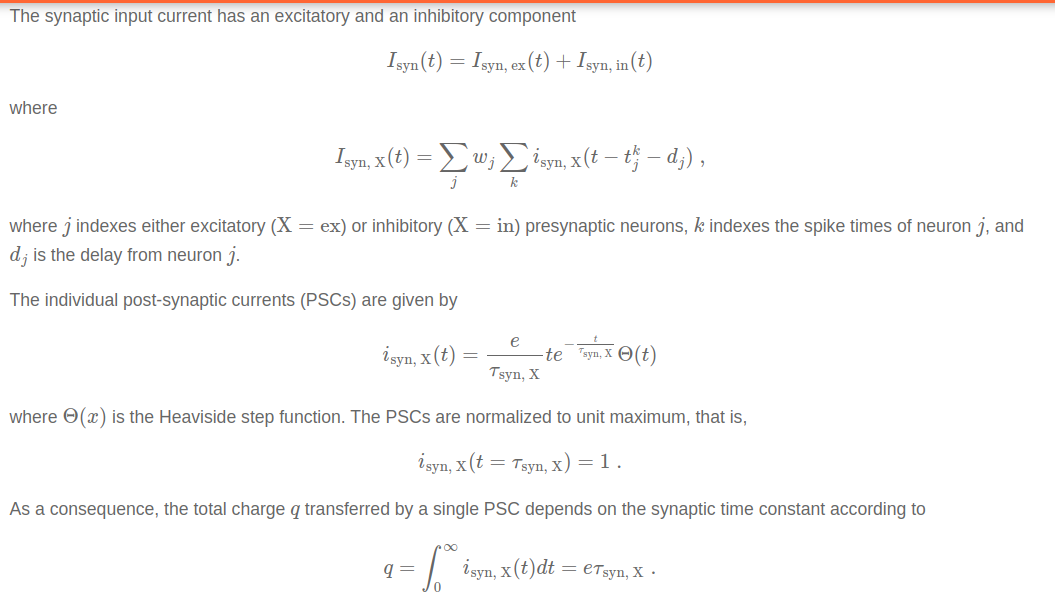

In [1]:
import nest
import matplotlib.pyplot as plt


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
nest.rng_seed = 1

neuron_params = {
    'E_L': -70, 
    'V_reset': -70,
    'V_th': -50,
    'tau_m': 20,
    't_ref': 2,
    'C_m' : 307.7 #C_m = tau/R with R being 65MOhms
}

<p>An example of the alpha shape of an incoming current from one presynaptic poisson input</p>


Nov 23 17:14:02 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 23 17:14:02 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 100
    Number of OpenMP threads: 1
    Not using MPI

Nov 23 17:14:02 SimulationManager::run [Info]: 
    Simulation finished.


Text(0, 0.5, 'Voltage (mV)')

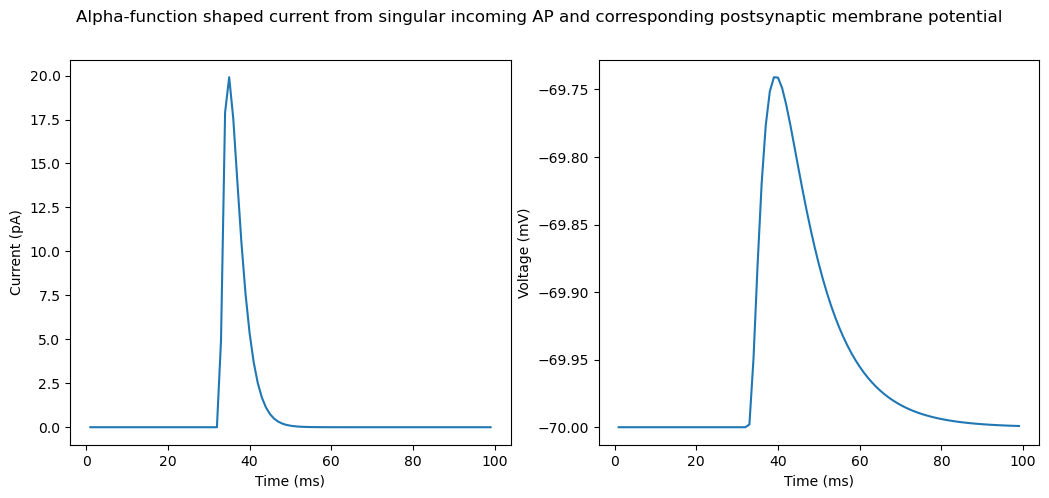

In [3]:
neuron = nest.Create('iaf_psc_alpha')
poisson_input = nest.Create('poisson_generator')
poisson_input.set(rate=5)
vm_recorder = nest.Create('multimeter')
vm_recorder.set(record_from=['V_m'])

Isyn_recorder = nest.Create('multimeter')
Isyn_recorder.set(record_from=['I_syn_ex'])

nest.Connect(Isyn_recorder, neuron)
nest.Connect(vm_recorder, neuron)
nest.Connect(poisson_input, neuron, syn_spec={'weight': 20})

nest.Simulate(100.0)

dmm_events = vm_recorder.get()['events']
dmm_events2 = Isyn_recorder.get()['events']
Vms = dmm_events['V_m']
Isyns = dmm_events2['I_syn_ex']
ts = dmm_events['times']

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Alpha-function shaped current from singular incoming AP and corresponding postsynaptic membrane potential')
fig.set_figwidth(12.5)
fig.set_figheight(5)
ax1.plot(ts, Isyns)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Current (pA)')
ax2.plot(ts, Vms)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Voltage (mV)')

In [4]:
nest.ResetKernel()


Nov 23 17:14:02 NodeManager::prepare_nodes [Info]: 
    Preparing 6 nodes for simulation.

Nov 23 17:14:02 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 6
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Nov 23 17:14:02 SimulationManager::run [Info]: 
    Simulation finished.


(-8.0, 209.0)

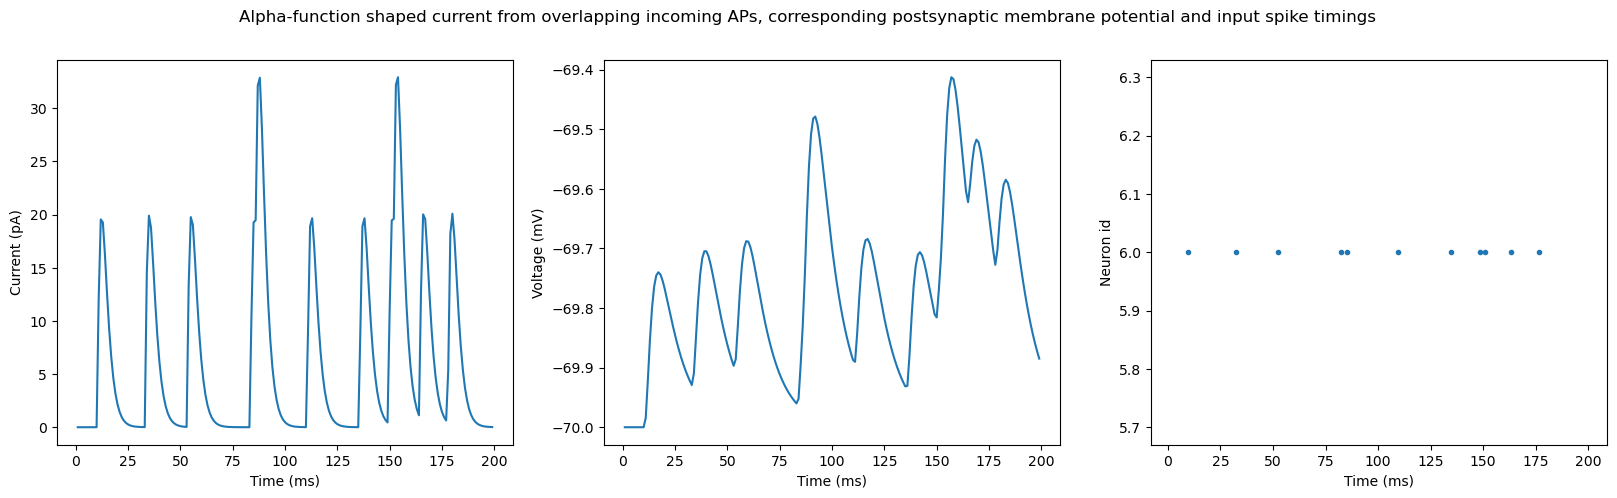

In [5]:
neuron = nest.Create('iaf_psc_alpha')
poisson_input = nest.Create('poisson_generator')
poisson_input.set(rate=50)

vm_recorder = nest.Create('multimeter')
vm_recorder.set(record_from=['V_m'])

Isyn_recorder = nest.Create('multimeter')
Isyn_recorder.set(record_from=['I_syn_ex'])

spike_recorder = nest.Create('spike_recorder')

parrot_neuron = nest.Create('parrot_neuron')

nest.Connect(Isyn_recorder, neuron)
nest.Connect(vm_recorder, neuron)
nest.Connect(poisson_input, parrot_neuron)
nest.Connect(parrot_neuron, neuron, syn_spec={'weight': 20})
nest.Connect(parrot_neuron, spike_recorder)

nest.Simulate(200.0)

dmm_events = vm_recorder.get()['events']
dmm_events2 = Isyn_recorder.get()['events']
spike_events = spike_recorder.get()['events']
Vms = dmm_events['V_m']
Isyns = dmm_events2['I_syn_ex']
spikes = spike_events['senders']
spike_ts = spike_events['times']
ts = dmm_events['times']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Alpha-function shaped current from overlapping incoming APs, corresponding postsynaptic membrane potential and input spike timings')
fig.set_figwidth(20)
fig.set_figheight(5)
ax1.plot(ts, Isyns)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Current (pA)')
ax2.plot(ts, Vms)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Voltage (mV)')
ax3.plot(spike_ts, spikes, '.')
ax3.set_xlabel('Time (ms)')
ax3.set_ylabel('Neuron id')
c

In [6]:
nest.ResetKernel()